<a href="https://colab.research.google.com/github/ayberkcorp/cap4630-artificial_intelligence/blob/master/HW_3/Homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 1

### Implement required functions:

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Generates random data for logistic regression with two features
def get_random_data(w, b, mu, sigma, m):
  data = np.empty((m, 2))
  labels = np.empty((m, 1))

  for i in range(m):
    c = np.random.randint(0, 2)
    x_1 = np.random.uniform()
    n = np.random.normal(mu, sigma)
    x_2 = w * x_1 + b + (-1) ** c * n

    labels[i] = c
    data[i][0] = x_1
    data[i][1] = x_2

  return data, labels

# Displays data generated by get_random_data()
def display_random_data(data, labels):
  plt.figure()
  for i in range(data.shape[0]):
    plt.scatter(data[i][0], data[i][1],
                c='red' if labels[i] else 'blue')

### Experimentation:

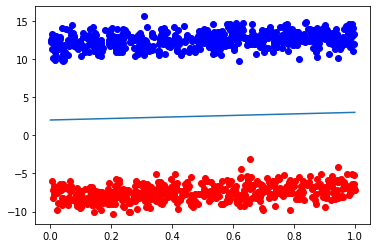

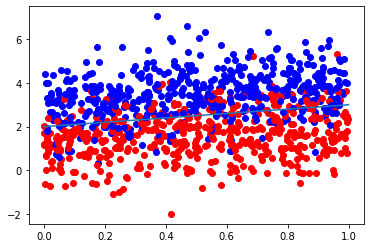

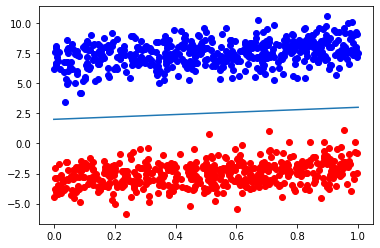

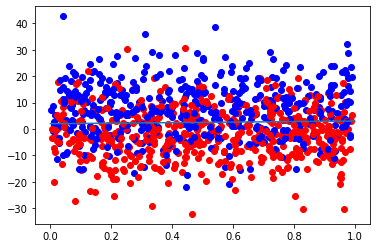

In [44]:
# Trial 1: mu = 10, sigma = 1
data, labels = get_random_data(1, 2, 10, 1, 1000)
display_random_data(data, labels)
plt.plot([0, 1], [2, 3])

# Trial 2: mu = 1, sigma = 1
data, labels = get_random_data(1, 2, 1, 1, 1000)
display_random_data(data, labels)
plt.plot([0, 1], [2, 3])

# Trial 3: mu = 5, sigma = 1
data, labels = get_random_data(1, 2, 5, 1, 1000)
display_random_data(data, labels)
plt.plot([0, 1], [2, 3])

# Trial 4: mu = 5, sigma = 10
data, labels = get_random_data(1, 2, 5, 10, 1000)
display_random_data(data, labels)
plt.plot([0, 1], [2, 3]);

### Split data:

Split the data and labels from trial 4 into a training set (80%) and a test set (20%).

In [0]:
split_index = int(0.8 * data.shape[0])
training_data = data[:split_index]
training_labels = labels[:split_index]
test_data = data[split_index:]
test_labels = labels[split_index:]

# Problem 2

### Implement Logistic Regression:

Here, we use stochastic gradient descent (SGD) and binary cross entropy loss.

In [46]:
%tensorflow_version 2.x
import tensorflow as tf

# Build and compile model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
            loss='binary_crossentropy',
            metrics=['accuracy'])

# Train model
history = model.fit(training_data,
                    training_labels,
                    epochs=100,
                    batch_size=20,
                    validation_data=(test_data, test_labels))

Epoch 1/100
40/40 [==============================] - 0s 3ms/step - loss: 1.8444 - accuracy: 0.6463 - val_loss: 1.7806 - val_accuracy: 0.6650
Epoch 2/100
40/40 [==============================] - 0s 2ms/step - loss: 1.7591 - accuracy: 0.6463 - val_loss: 1.6999 - val_accuracy: 0.6650
Epoch 3/100
40/40 [==============================] - 0s 2ms/step - loss: 1.6794 - accuracy: 0.6450 - val_loss: 1.6213 - val_accuracy: 0.6650
Epoch 4/100
40/40 [==============================] - 0s 2ms/step - loss: 1.5968 - accuracy: 0.6463 - val_loss: 1.5412 - val_accuracy: 0.6650
Epoch 5/100
40/40 [==============================] - 0s 2ms/step - loss: 1.5138 - accuracy: 0.6488 - val_loss: 1.4578 - val_accuracy: 0.6650
Epoch 6/100
40/40 [==============================] - 0s 2ms/step - loss: 1.4345 - accuracy: 0.6500 - val_loss: 1.3797 - val_accuracy: 0.6650
Epoch 7/100
40/40 [==============================] - 0s 2ms/step - loss: 1.3520 - accuracy: 0.6500 - val_loss: 1.3002 - val_accuracy: 0.6650
Epoch 8/100
4

### Obtain the separating line:

To find our separating line, we need to first find $w_1$, $w_2$, and $b_{model}$ for our trained model.  

Once we know these values, then we can find our predicted weight $w_p$ and predicted bias $b_p$ for the separating line like so:

$w_1 x_1 + w_2 x_2 = b_{model} = 0 \implies x_2 = -\left(\frac{w_1}{w_2} \right) x_1 - \left(\frac{b_{model}}{w_2} \right) \implies w_p = -\left(\frac{w_1}{w_2} \right), \space b_p = -\left(\frac{b_{model}}{w_2} \right)$.

# Sources

https://github.com/schneider128k/machine_learning_course/blob/master/slides/logistic_regression.pdf

https://colab.research.google.com/drive/1hUc_4HTtPQ2Xq0XXnokV4uoK84zmmvQR